In [59]:
import pandas as pd

fert = pd.read_csv('gapminder_total_fertility.csv', index_col=0)
life = pd.read_excel("./gapminder_lifeexpectancy.xlsx", index_col=0)
cont = pd.read_csv("./continents.csv", sep=';')

In [2]:
print(life.shape)

(260, 217)


In [3]:
fert.columns

Index(['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808',
       '1809',
       ...
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object', length=216)

In [4]:
life.columns

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', length=217)

In [5]:
fert.columns = fert.columns.astype(int)

In [6]:
fert.index

Index(['Abkhazia', 'Afghanistan', 'Akrotiri and Dhekelia', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda',
       ...
       'Vietnam', 'Virgin Islands (U.S.)', 'North Yemen (former)',
       'South Yemen (former)', 'Yemen', 'Yugoslavia', 'Zambia', 'Zimbabwe',
       'Åland', 'Åland'],
      dtype='object', name='Total fertility rate', length=260)

In [7]:
fert.index.name = 'country'
life.index.name = 'country'

In [8]:
fert = fert.reset_index()
life = life.reset_index()

In [9]:
fert = fert.melt(id_vars='country', var_name='year', value_name='fertility_rate')

In [10]:
life = life.melt(id_vars='country', var_name='year', value_name='life_expectancy')

In [11]:
pop = pd.read_excel("gapminder_population.xlsx", index_col=0)

In [24]:
#del pop['Unnamed: 81']

In [25]:
pop.index.name = 'country'
pop = pop.reset_index()

In [26]:
pop = pop.melt(id_vars='country', var_name='year', value_name='population')

In [60]:
cont.columns

Index(['continent', 'country'], dtype='object')

In [73]:
le_tf_gif = './{}.png'.format(1984)

In [74]:
le_tf_gif

'./1984.png'

In [33]:
df_pf = fert.merge(pop)

In [34]:
df_pf

,country,year,fertility_rate,population
0,Abkhazia,1800,NaN,NaN
1,Afghanistan,1800,7.00,3280000.0
2,Akrotiri and Dhekelia,1800,NaN,NaN
3,Albania,1800,4.60,410445.0
4,Algeria,1800,6.99,2503218.0
...,...,...,...,...
20974,Yugoslavia,2015,NaN,NaN
20975,Zambia,2015,5.59,16211767.0
20976,Zimbabwe,2015,3.35,15602751.0
20977,Åland,2015,NaN,NaN


In [36]:
df_plf = df_pf.merge(life)

In [61]:
df_plfc = df_plf.merge(cont)

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df_scandinavia = df_plf.loc[df_plf['country'].isin(['Norway', 'Sweden', 'Denmark'])]

In [40]:
df_scandinavia

,country,year,fertility_rate,population,life_expectancy
59,Denmark,1800,4.04,1062514.0,37.41
168,Norway,1800,4.32,868570.0,37.92
217,Sweden,1800,4.07,2354189.0,32.16
318,Denmark,1810,4.09,1108146.0,41.71
427,Norway,1810,3.87,918398.0,36.48
...,...,...,...,...,...
20629,Norway,2014,1.93,5147970.0,82.00
20678,Sweden,2014,1.93,9703247.0,82.10
20779,Denmark,2015,1.89,5669081.0,80.40
20888,Norway,2015,1.93,5210967.0,82.00


<AxesSubplot:xlabel='year', ylabel='life_expectancy'>

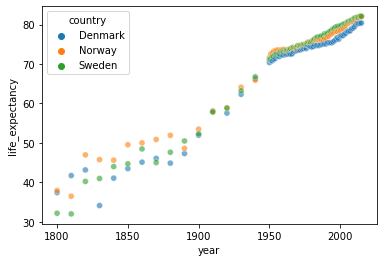

In [41]:
sns.scatterplot(x='year', y='life_expectancy', hue='country',
            data=df_scandinavia, alpha=0.6)

In [85]:
#yr_list = df[df_plf["year"].unique()

In [84]:
#yr_list

In [82]:
#co_list = df_plf["country"].unique()

In [83]:
#co_list

In [87]:
df_scandinavia[df_scandinavia['year']==1800]

,country,year,fertility_rate,population,life_expectancy
59,Denmark,1800,4.04,1062514.0,37.41
168,Norway,1800,4.32,868570.0,37.92
217,Sweden,1800,4.07,2354189.0,32.16


In [86]:
#df_plfc

In [72]:
for y in range(1960,2015):     
    df_tmp_y = df_plfc.loc[df_plfc['year']==y]
    sns.scatterplot(x='fertility_rate', y='life_expectancy', hue='continent', size='population', data=df_tmp_y, alpha=0.6)
    str_year = str(y)
    plt.savefig('./{}.png'.format(str_year))
    plt.close()

In [76]:
import imageio

In [81]:
le_tf_list = []

for y in range(1960,2015):
    str_year = str(y)
    png_per_annum = './{}.png'.format(str_year)
    le_tf_list.append(imageio.imread(png_per_annum))
    
#print(le_tf_list)

imageio.mimsave('./final.gif', le_tf_list, fps=10)